<a href="https://colab.research.google.com/github/SiddhiAsai/Advanced-Artificial-Intelligence/blob/main/Practical_1(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

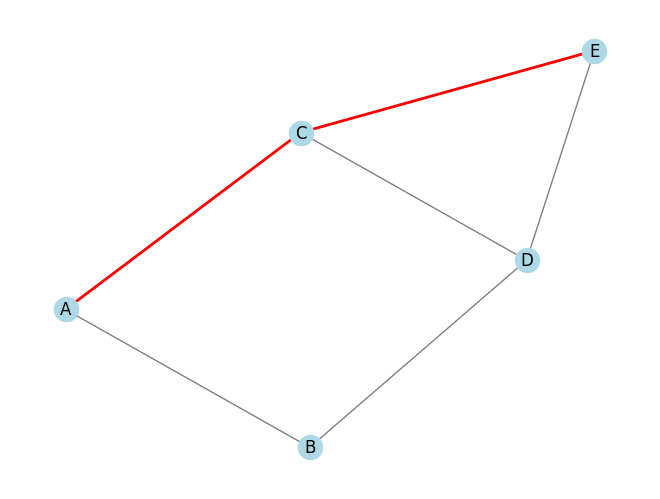

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, node, neighbor):
        if node not in self.graph:
            self.graph[node] = []
        if neighbor not in self.graph:
            self.graph[neighbor] = []
        self.graph[node].append(neighbor)
        self.graph[neighbor].append(node)

    def bfs(self, start, goal):
        queue = deque([[start]])
        visited = set()

        while queue:
            path = queue.popleft()
            node = path[-1]

            if node == goal:
                return path

            if node not in visited:
                visited.add(node)
                for neighbor in self.graph.get(node, []):
                    new_path = list(path)
                    new_path.append(neighbor)
                    queue.append(new_path)
        return []

graph = Graph()
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]
for edge in edges:
    graph.add_edge(*edge)

path = graph.bfs('A', 'E')

G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.show()


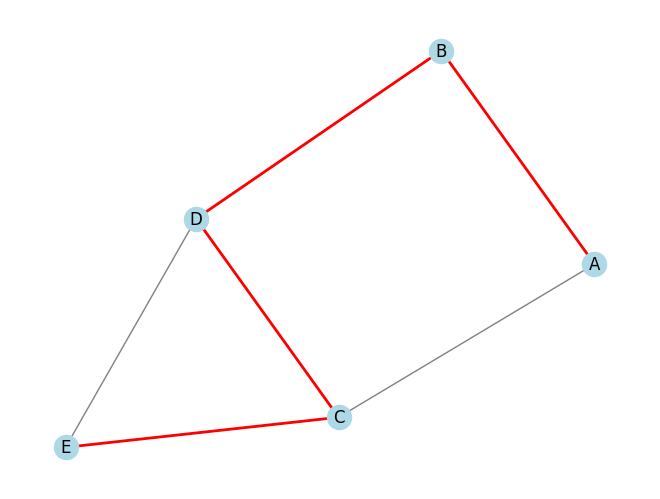

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, node, neighbor):
        if node not in self.graph:
            self.graph[node] = []
        if neighbor not in self.graph:
            self.graph[neighbor] = []
        self.graph[node].append(neighbor)
        self.graph[neighbor].append(node)

    def dfs(self, start, goal, path=None, visited=None):
        if path is None:
            path = []
        if visited is None:
            visited = set()

        path.append(start)
        visited.add(start)

        if start == goal:
            return path

        for neighbor in self.graph.get(start, []):
            if neighbor not in visited:
                new_path = self.dfs(neighbor, goal, path[:], visited)
                if new_path:
                    return new_path
        return []

graph = Graph()
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]
for edge in edges:
    graph.add_edge(*edge)

path = graph.dfs('A', 'E')

G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.show()


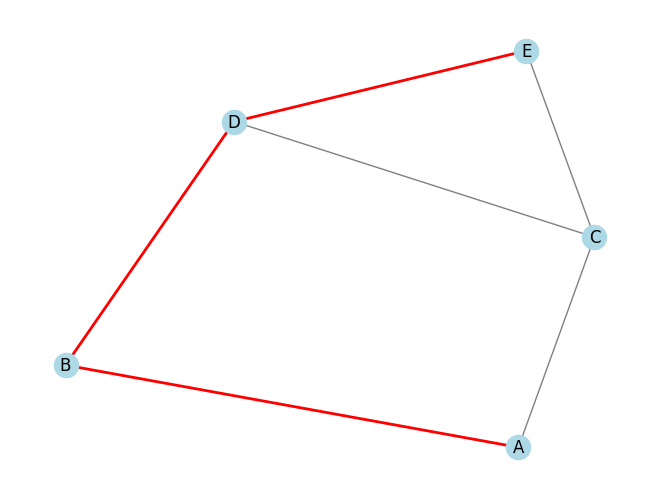

In [3]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, node, neighbor, cost):
        if node not in self.graph:
            self.graph[node] = []
        if neighbor not in self.graph:
            self.graph[neighbor] = []
        self.graph[node].append((neighbor, cost))
        self.graph[neighbor].append((node, cost))

    def astar(self, start, goal, heuristic):
        pq = []
        heapq.heappush(pq, (0, start))
        g_cost = {node: float('inf') for node in self.graph}
        g_cost[start] = 0
        came_from = {}

        while pq:
            _, current = heapq.heappop(pq)

            if current == goal:
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                path.append(start)
                return path[::-1]

            for neighbor, cost in self.graph[current]:
                new_cost = g_cost[current] + cost
                if new_cost < g_cost[neighbor]:
                    g_cost[neighbor] = new_cost
                    f_cost = new_cost + heuristic(neighbor, goal)
                    heapq.heappush(pq, (f_cost, neighbor))
                    came_from[neighbor] = current
        return []

def heuristic(node, goal):
    return abs(ord(goal) - ord(node))

graph = Graph()
edges = [('A', 'B', 1), ('A', 'C', 4), ('B', 'D', 2), ('C', 'D', 1), ('C', 'E', 5), ('D', 'E', 3)]
for edge in edges:
    graph.add_edge(*edge)

path = graph.astar('A', 'E', heuristic)

G = nx.Graph()
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.show()
